<a href="https://colab.research.google.com/github/deconasser/UdemyCourse/blob/main/Jose%20Portilla%2C%20Plerian%20Training/Section6/Section6_Contour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Contours are defined as simply a curve joining all the continuos points(along the boundary), having same color or intensity

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


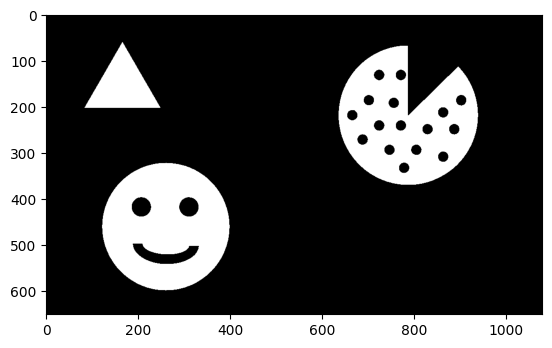

In [40]:
img = cv2.imread("/content/internal_external.png", 0)
# Chuyển đổi ảnh xám sang ảnh nhị phân
ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

In [32]:
# Các tham số: cv2.findContours
#
#     image:
#         Loại: Ảnh nguồn (nhị phân, thường là ảnh đen trắng)
#         Mô tả: Ảnh đầu vào trong đó các đường viền sẽ được tìm kiếm. Ảnh này nên được xử lý trước (ví dụ: chuyển đổi sang ảnh nhị phân sử dụng cv2.threshold hoặc cv2.Canny).

#     mode:
#         Loại: Chế độ trích xuất đường viền
#         Mô tả: Xác định cách các đường viền sẽ được trả về. Các giá trị có thể:
#             cv2.RETR_EXTERNAL: Chỉ trả về các đường viền ngoài cùng.
#             cv2.RETR_LIST: Trả về tất cả các đường viền mà không tạo cấu trúc phân cấp.
#             cv2.RETR_CCOMP: Trả về tất cả các đường viền và tổ chức chúng thành hai cấp độ (đối tượng và lỗ).
#             cv2.RETR_TREE: Trả về tất cả các đường viền và tổ chức chúng thành cấu trúc phân cấp đầy đủ của các đường viền được nhúng.

#     method:
#         Loại: Phương pháp xấp xỉ đường viền
#         Mô tả: Xác định cách các điểm trên đường viền sẽ được xấp xỉ. Các giá trị có thể:
#             cv2.CHAIN_APPROX_NONE: Lưu tất cả các điểm trên đường viền.
#             cv2.CHAIN_APPROX_SIMPLE: Lưu các điểm đầu tiên và cuối cùng của mỗi đoạn đường thẳng, loại bỏ các điểm trung gian.
#             cv2.CHAIN_APPROX_TC89_L1 và cv2.CHAIN_APPROX_TC89_KCOS: Sử dụng thuật toán Teh-Chin để xấp xỉ đường viền.

#     contours (tùy chọn):
#         Loại: Đầu ra (output)
#         Mô tả: Danh sách các điểm trên các đường viền được phát hiện.

#     hierarchy (tùy chọn):
#         Loại: Đầu ra (output)
#         Mô tả: Thông tin phân cấp về các đường viền được phát hiện. Đây là một mảng có cùng số lượng phần tử với các đường viền, trong đó mỗi phần tử là một danh sách 4 giá trị: [Next, Previous, First_Child, Parent].

#     offset (tùy chọn):
#         Loại: Tuple
#         Mô tả: Dịch chuyển các điểm đường viền theo giá trị (x, y).

In [48]:
# Tìm các đường viền trong ảnh
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [60]:
external_contours = np.zeros(img.shape)
external_contours.shape
internal_contours = np.zeros(img.shape)
internal_contours.shape

(652, 1080)

In [62]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

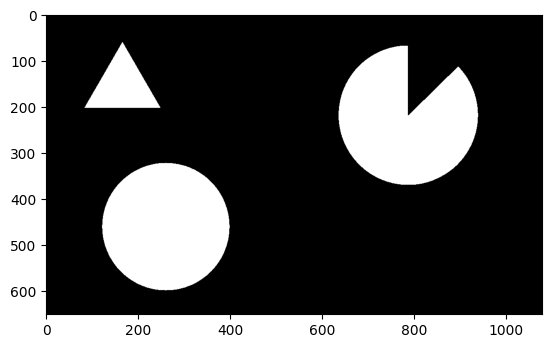

In [63]:
plt.imshow(external_contours, cmap="gray")

In [64]:
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

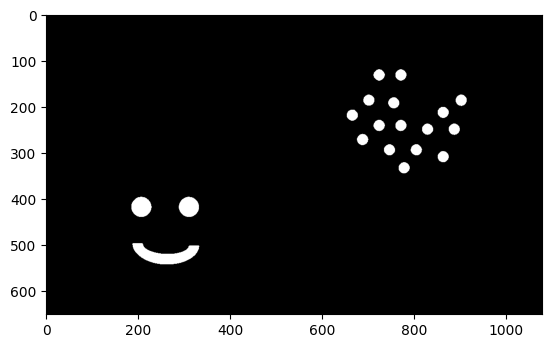

In [65]:
plt.imshow(internal_contours, cmap="gray")